### Importing Necessary Libraries

In [787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [788]:
data = pd.read_csv("Titanic-Dataset.csv")
training_data = data.copy()
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [789]:
nan_ratios = training_data.isna().sum()
print(nan_ratios)
print(training_data['Ticket'].nunique())
print(training_data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
681
(891, 12)


Here we can see that `Cabin` and `Age` have a lot of NaN values. So i decided to drop the `Cabin` column altogether and filled the naN values of `Age` with its mean. Additionaly I dropped the 2 rows with NaN `Embarked` values.

We can also see that the `Ticket` column has 681 unique values out of 891 total values. So I decided to drop this column too

In [790]:
training_data = training_data.drop(["PassengerId", "Name","Cabin", "Ticket"], axis = 1)
training_data["Age"].fillna(value=training_data["Age"].mean(), inplace=True) # Replacing NaN values with the mean

training_data.dropna(inplace=True)
training_data.isna().sum()


C:\Users\VivoBook Pro 15\AppData\Local\Temp\ipykernel_17472\3312003269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data["Age"].fillna(value=training_data["Age"].mean(), inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [791]:
print(training_data["Age"].mean())
training_data.head()

29.65344637067425


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [792]:
X = training_data.drop("Survived", axis=1) # training features
y = training_data["Survived"] # Target
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


Now lets one hot encode `Sex` and `Embarked`.

In [793]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,False,True
4,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,False,True
888,3,29.699118,1,2,23.4500,True,False,False,False,True
889,1,26.000000,0,0,30.0000,False,True,True,False,False


In [794]:
y.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

### Scaling The Input Features

In [795]:
X = (X - X.mean()) / X.std() # Z-Score Normalization

In [796]:
# Convert all columns in X to float64
X = X.astype(float)

# Ensuring y is also a NumPy array with float64 type
y = y.astype(float).values.reshape(-1, 1)

### Implementing The Model

In [797]:
def sigmoid(z):
    z = np.array(z, dtype=np.float64)
    return 1 / (1 + np.exp(-z)) # Returns the probability of x being 1 i.e. p(x)

In [798]:
def h(X, theta):
    return sigmoid(np.dot(X, theta)) # wraps the linear hypothesis in the sigmoid function

In [799]:
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = h(X, theta)  # p(x)
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) # cross-entropy cost function
    return cost

In [800]:
def compute_gradient(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = h(X, theta)  # p(x)
    errors = predictions - y  # Errors: h(X) - y
    gradient = (1 / m) * np.dot(X.T, errors) 
    return gradient

In [801]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)  # Compute gradient
        theta -= learning_rate * gradient  # Update theta(weights)
        cost = compute_cost(X, y, theta)  # Compute cost
        cost_history.append(cost)  # Save cost for analysis
    return theta, cost_history

In [802]:
def model(X, y, learning_rate=0.01, iterations=1000):
    y = y.reshape(-1,1)    
    # Initialize parameters
    theta = np.zeros((X.shape[1], 1))
    
    # Perform gradient descent
    theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
    return theta, cost_history

In [803]:
learning_rate = 0.001
iterations = 25000
theta, cost_history = model(X, y, learning_rate, iterations)

print("Learned Parameters (theta):")
print(theta)
print("\nFinal Cost:", cost_history[-1])

Learned Parameters (theta):
[[-0.72032602]
 [-0.41809142]
 [-0.30430062]
 [-0.1273247 ]
 [ 0.27759233]
 [ 0.64507861]
 [-0.64507861]
 [ 0.09535038]
 [ 0.01198231]
 [-0.09108756]]

Final Cost: 0.47204408263923103


### Visualizing Cost over Iterations

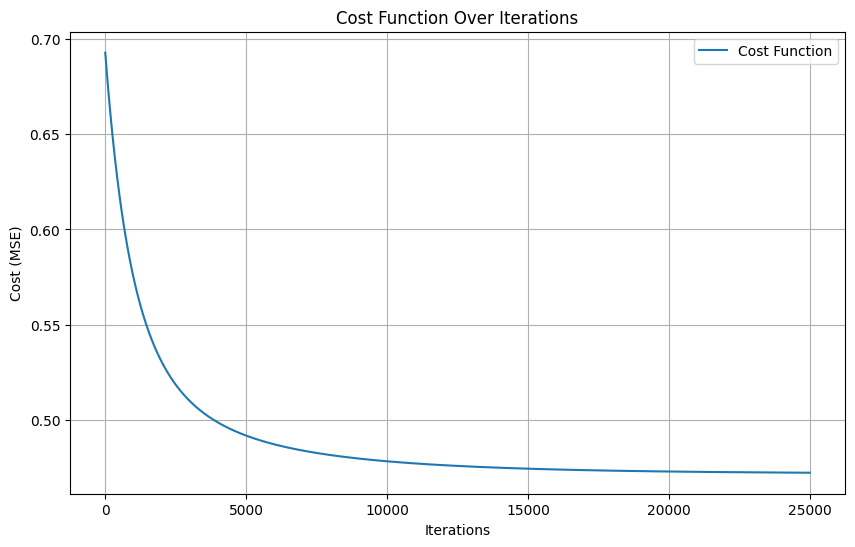

In [804]:
# Plot the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

### Classifying The Probabilities

In [805]:
y_pred_prob = h(X, theta)  # p(x)

# Converting p(x) to classes (threshold of 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

### Printing Accuracy Metrics

In [806]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, confusion_matrix


accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
log_loss_value = log_loss(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"AUC: {auc}")


Accuracy: 0.7829021372328459
Precision: 0.6939313984168866
Recall: 0.7735294117647059
F1 Score: 0.7315716272600834
Log Loss: 0.472044082639231
AUC: 0.8555796635594128


### Printing Confusion Matrix

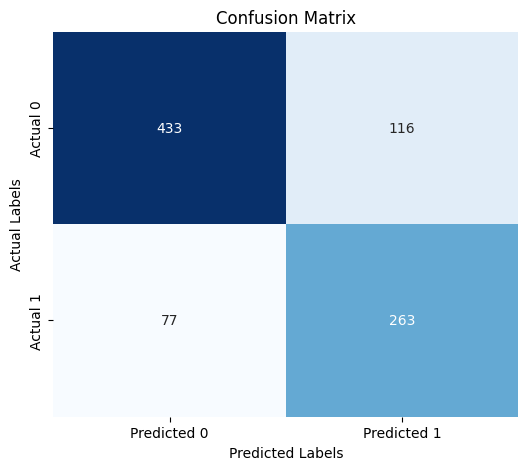

In [807]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()
